In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

data = pd.read_excel("107_Xitun2.xls",usecols=["日期","測項","09"],index_col=1) 

In [2]:
e=data
e["09"]=data["09"].astype('str').str.split("#").str.get(0).str.split("x").str.get(0).str.split("*").str.get(0)
c=e.loc[["PM2.5","CO","SO2"]]
print(c)


               日期   09
測項                    
PM2.5  2018/01/01   17
PM2.5  2018/01/02   37
PM2.5  2018/01/03   34
PM2.5  2018/01/04  106
PM2.5  2018/01/05   19
...           ...  ...
SO2    2018/12/27  1.8
SO2    2018/12/28    2
SO2    2018/12/29  1.1
SO2    2018/12/30  1.9
SO2    2018/12/31  1.3

[1095 rows x 2 columns]


In [3]:
newData=c.replace({'NR':0,"nan":0}).pivot_table(values='09',index=['日期'],columns='測項',aggfunc='sum').astype('float')
print(newData)

測項            CO  PM2.5  SO2
日期                          
2018/01/01  0.32   17.0  3.4
2018/01/02  1.11   37.0  4.1
2018/01/03  0.60   34.0  2.0
2018/01/04  0.99  106.0  6.2
2018/01/05  0.35   19.0  3.0
...          ...    ...  ...
2018/12/27  0.27    8.0  1.8
2018/12/28  0.27    4.0  2.0
2018/12/29  0.24   11.0  1.1
2018/12/30  0.25    9.0  1.9
2018/12/31  0.23    4.0  1.3

[365 rows x 3 columns]


In [4]:
newData.index = pd.to_datetime(newData.index,format='%Y-%m-%d')
type(newData.index)
d=newData.groupby(newData.index.month).mean()
d.index.name='Mon'
d.columns.names=[' Test item ']

In [5]:
print(d)

 Test item         CO      PM2.5       SO2
Mon                                       
1            0.439032  19.870968  2.454839
2            0.482500  25.785714  2.417857
3            0.463548  29.645161  2.980645
4            0.363333  29.166667  2.990000
5            0.291290  20.451613  2.525806
6            0.261333  16.433333  3.086667
7            0.271290  17.645161  2.761290
8            0.279032  15.741935  2.435484
9            0.258000  18.533333  2.356667
10           0.316452  20.258065  2.074194
11           0.467333  23.100000  2.553333
12           0.441935  16.838710  2.429032


<AxesSubplot:xlabel='Mon'>

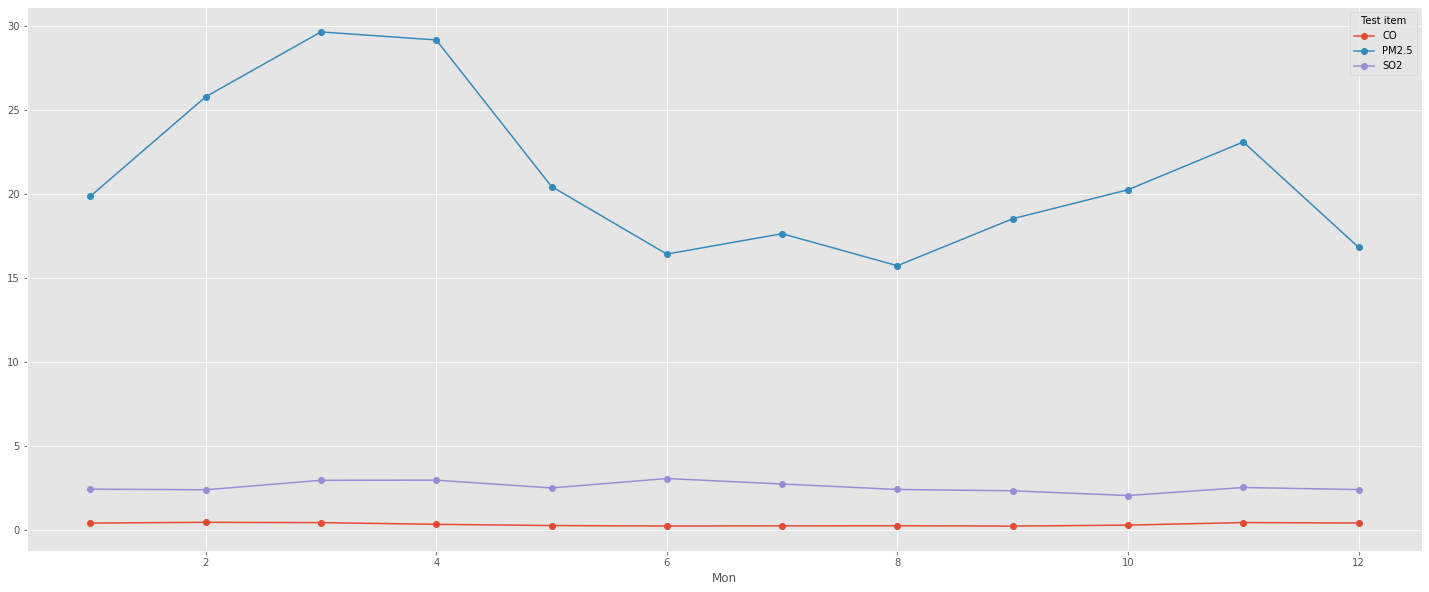

In [6]:

#c.index = pd.to_datetime(c.index,format='%m')
d.plot(kind='line',style='-o',figsize=(25,10))